### Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Practice pandas DataFrame indexing

One way to creata a pandas DataFrame from scratch is to pass it a dictionary as input. Note the recycling of values in columns A and B. Also remember that the columns of the dataframe can be of different types, but the entire column must be of the same type. See in column D how all of the numbers are converted to floats with 2 decimal precision.

In [2]:
df = pd.DataFrame({'A' : 1.,
                   'B' : 1,
                   'C' : ["Steph", "Dylan", "Kate", "Fred", "Mike"],
                   'D' : [3.14, 4, 5, 6, 7]})
df

,A,B,C,D
0,1.0,1,Steph,3.14
1,1.0,1,Dylan,4.00
2,1.0,1,Kate,5.00
3,1.0,1,Fred,6.00
4,1.0,1,Mike,7.00


In [3]:
df.dtypes

A    float64
B      int64
C     object
D    float64
dtype: object

There are several different ways of indexing rows and columns in pandas. The first is integer indexing with the `.iloc[]` method, which extracts rows and/or columns based on their numeric index.

In [4]:
df.iloc[0:2, 0:3]

,A,B,C
0,1.0,1,Steph
1,1.0,1,Dylan


The second is name-based indexing with the `.loc[]` method, which extracts rows and/or columns based on their name.

In [5]:
df.loc[[0, 3], ["A", "C"]]

,A,C
0,1.0,Steph
3,1.0,Fred


The next is a shortcut for name-based indexing of columns by simply enclosing the name of that column in square brackets. Note also that if you extract a single column from a DataFrame, it is returned as a Series--a one-dimensional pandas object.

In [6]:
df["A"].shape

(5,)

In contrast, when you extract multiple columns, the subset is returned as another pandas DataFrame.

In [7]:
df[["A", "B"]].shape

(5, 2)

Finally, we have Boolean indexing, where you can extract all rows or columns, again using the `.loc[]` method, where the index is equal to `True`. This is often useful for subsetting rows or columns where the value in that row or column meets some specified condition (e.g., is greater than some number). 

In [8]:
my_bool = [True, False, True, False, True]
df.loc[my_bool]

,A,B,C,D
0,1.0,1,Steph,3.14
2,1.0,1,Kate,5.00
4,1.0,1,Mike,7.00


### Load the GTEx data

Now we can start working with some real data. We obtained human multi-tissue gene expression data from the GTEx Project, by downloading it from the GTEx Data Portal. The file is gzip compressed (ends in the `.gz` extension), so we use the option `compression = "gzip"`. We also skip the first two rows, which have unique formatting and specify that the file is tab-separated.

Download the file here: https://storage.googleapis.com/gtex_analysis_pilot_v3/rna_seq_data/GTEx_Analysis_RNA-seq_RNA-SeQCv1.1.8_gene_rpkm__Pilot_V3_patch1.gct.gz

In [10]:
df_rpkms = pd.read_csv("~/Downloads/RNA-seq.gct.gz",
                       compression = "gzip",
                       skiprows = 2,
                       sep = "\t")

df_rpkms

,Name,Description,GTEX-N7MS-0007-SM-2D7W1,GTEX-N7MS-0011-R10A-SM-2HMJK,GTEX-N7MS-0011-R11A-SM-2HMJS,GTEX-N7MS-0011-R1a-SM-2HMJG,GTEX-N7MS-0011-R2a-SM-2HML6,GTEX-N7MS-0011-R3a-SM-33HC6,GTEX-N7MS-0011-R4a-SM-2HMKW,GTEX-N7MS-0011-R5a-SM-2HMK8,...,GTEX-X4LF-0526-SM-3NMB6,GTEX-X4LF-1726-SM-3NMBZ,GTEX-X4XX-0005-SM-3NMCS,GTEX-X4XX-0011-R1B-SM-3P622,GTEX-X4XX-0011-R2A-SM-3P623,GTEX-X4XX-0126-SM-3NMC2,GTEX-X4XX-0626-SM-3NMC1,GTEX-X4XX-1126-SM-3NMBY,GTEX-X4XX-2926-SM-3NMB1,GTEX-X4XX-3026-SM-3NMB2
0,ENSG00000223972.4,DDX11L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.029181,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050261,0.000000
1,ENSG00000227232.3,WASH7P,2.917592,1.958602,5.841671,1.728239,2.315600,3.742634,2.269886,2.442356,...,9.417033,7.007399,6.276984,3.710413,5.769073,12.540883,4.696292,4.555761,9.459983,5.700174
2,ENSG00000243485.1,MIR1302-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.102921,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENSG00000237613.2,FAM138A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000240361.1,OR4G11P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015078,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52571,ENSG00000198786.2,MT-ND5,627.419189,3967.486572,1014.433228,4683.750000,2813.970947,2435.256104,3997.514893,5427.200684,...,3997.743164,1589.340210,277.970520,7192.353516,1723.450684,2418.593018,3559.731689,2795.689209,1894.077515,3302.491699
52572,ENSG00000198695.2,MT-ND6,553.020569,2737.471680,787.444824,3694.725342,1631.243652,2049.827148,2676.096191,3723.490234,...,6915.279297,1867.175537,400.203766,8612.575195,1159.216675,4115.834473,5160.529297,2533.044434,1654.201904,3118.078125
52573,ENSG00000210194.1,J01415.21,0.434417,0.000000,0.243951,0.847667,0.000000,0.357784,1.051482,0.811884,...,2.372880,0.214025,0.000000,0.974938,0.199876,0.621196,1.584828,0.217481,0.410828,0.000000
52574,ENSG00000198727.2,MT-CYB,2022.417969,20763.693359,7525.217285,24014.476562,13874.849609,12816.257812,18059.113281,26712.630859,...,7216.080078,9511.128906,1375.219727,24179.337891,3829.971191,10955.970703,10365.626953,20897.306641,7734.621094,12888.306641


We saw that pandas DataFrames possess some methods that can operate on entire rows or columns. For example, by passing the `axis = 1` option to the `.median()` method, we get the median expression of every gene across all samples.  

In [48]:
df_rpkms.median(axis = 1)

1           5.917334
6           0.292475
7           0.366028
8           2.838867
9           0.461117
            ...     
52566    4430.683105
52571    2376.176025
52572    2423.041016
52573       0.342601
52574    8809.516602
Length: 24740, dtype: float64

In order to make sense of PCA, we need to filter out very low expressed genes. This decision is arbitrary, but here we decided to choose genes with median expression greater than zero. we create a new variable `roi`, which records `True` if median expression is greater than zero and `False` if not.

In [12]:
roi = df_rpkms.median(axis = 1) > 0
roi

0        False
1         True
2        False
3        False
4        False
         ...  
52571     True
52572     True
52573     True
52574     True
52575    False
Length: 52576, dtype: bool

We can then subset the genes (stored in rows of the original DataFrame) based on this Boolean Series.

In [13]:
df_rpkms = df_rpkms.loc[roi, :]
df_rpkms

,Name,Description,GTEX-N7MS-0007-SM-2D7W1,GTEX-N7MS-0011-R10A-SM-2HMJK,GTEX-N7MS-0011-R11A-SM-2HMJS,GTEX-N7MS-0011-R1a-SM-2HMJG,GTEX-N7MS-0011-R2a-SM-2HML6,GTEX-N7MS-0011-R3a-SM-33HC6,GTEX-N7MS-0011-R4a-SM-2HMKW,GTEX-N7MS-0011-R5a-SM-2HMK8,...,GTEX-X4LF-0526-SM-3NMB6,GTEX-X4LF-1726-SM-3NMBZ,GTEX-X4XX-0005-SM-3NMCS,GTEX-X4XX-0011-R1B-SM-3P622,GTEX-X4XX-0011-R2A-SM-3P623,GTEX-X4XX-0126-SM-3NMC2,GTEX-X4XX-0626-SM-3NMC1,GTEX-X4XX-1126-SM-3NMBY,GTEX-X4XX-2926-SM-3NMB1,GTEX-X4XX-3026-SM-3NMB2
1,ENSG00000227232.3,WASH7P,2.917592,1.958602,5.841671,1.728239,2.315600,3.742634,2.269886,2.442356,...,9.417033,7.007399,6.276984,3.710413,5.769073,12.540883,4.696292,4.555761,9.459983,5.700174
6,ENSG00000238009.2,RP11-34P13.7,0.177576,0.204927,0.289186,0.248324,0.268730,0.168188,0.408321,0.219865,...,0.229263,0.218716,0.658286,0.314833,0.514728,0.389351,0.255082,0.248918,0.487006,0.290606
7,ENSG00000239945.1,RP11-34P13.8,0.272705,0.202653,0.510465,0.280842,0.316025,0.162210,0.715072,0.254829,...,0.270831,0.134354,0.687998,0.479412,0.533255,0.357458,0.248718,0.273047,0.591012,0.261905
8,ENSG00000237683.3,RP11-34P13.11,88.187675,1.009232,1.577608,0.575865,0.981906,0.532865,1.030279,0.767670,...,10.860014,2.222919,128.481339,2.991933,1.625518,10.951993,0.531858,4.747769,3.747678,2.664726
9,ENSG00000239906.1,RP11-34P13.14,21.158670,0.097359,0.208453,0.000000,0.227738,0.152861,0.000000,0.130077,...,1.013800,0.457205,11.639369,0.208268,0.170792,0.928909,0.126958,0.371670,0.526572,0.171122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52566,ENSG00000198840.2,MT-ND3,546.563416,9898.380859,4572.871582,10415.388672,7144.897461,6341.940430,8621.208984,10017.948242,...,3578.243652,5226.624023,870.697571,13152.982422,3865.071777,4782.514160,3418.035400,16177.149414,4064.408936,6445.033691
52571,ENSG00000198786.2,MT-ND5,627.419189,3967.486572,1014.433228,4683.750000,2813.970947,2435.256104,3997.514893,5427.200684,...,3997.743164,1589.340210,277.970520,7192.353516,1723.450684,2418.593018,3559.731689,2795.689209,1894.077515,3302.491699
52572,ENSG00000198695.2,MT-ND6,553.020569,2737.471680,787.444824,3694.725342,1631.243652,2049.827148,2676.096191,3723.490234,...,6915.279297,1867.175537,400.203766,8612.575195,1159.216675,4115.834473,5160.529297,2533.044434,1654.201904,3118.078125
52573,ENSG00000210194.1,J01415.21,0.434417,0.000000,0.243951,0.847667,0.000000,0.357784,1.051482,0.811884,...,2.372880,0.214025,0.000000,0.974938,0.199876,0.621196,1.584828,0.217481,0.410828,0.000000


The sample names from GTEx (visible as column names here) are not particularly informative. To get more information about the individual GTEx samples, we need to load some separate metadata. This is also available from the GTEx Portal.

Download the file here: https://storage.googleapis.com/gtex_analysis_pilot_v3/annotations/GTEx_Analysis_Annotations_Sample_DS__Pilot_V3.txt

In [14]:
df_metadata = pd.read_csv("~/Downloads/GTEx_Analysis_Annotations_Sample_DS__Pilot_V3.txt", sep = "\t")
df_metadata

,SAMPID,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMTSISCH,SMNABTCH,SMNABTCHT,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
0,GTEX-N7MS-0007-SM-26GME,NaN,C1,NaN,8.2,Blood,Whole Blood,16-19 hours,BP-16653,RNA isolation_PAXgene Blood RNA (Manual),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GTEX-N7MS-0007-SM-26GMV,NaN,C1,NaN,8.2,Blood,Whole Blood,16-19 hours,BP-16653,RNA isolation_PAXgene Blood RNA (Manual),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GTEX-N7MS-0007-SM-2D43E,NaN,C1,NaN,8.2,Blood,Whole Blood,16-19 hours,BP-16653,RNA isolation_PAXgene Blood RNA (Manual),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GTEX-N7MS-0007-SM-2D7W1,NaN,C1,NaN,8.2,Blood,Whole Blood,16-19 hours,BP-16653,RNA isolation_PAXgene Blood RNA (Manual),...,13772179.0,18422595.0,0.002456,13504096.0,49.508575,0.041526,0.835199,852.0,0.563503,51.355957
4,GTEX-N7MS-0009-SM-2BWY4,NaN,C1,NaN,NaN,Blood,Whole Blood,16-19 hours,BP-16657,DNA isolation_Whole Blood _QIAGEN Puregene (Ma...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,K-562-SM-3NMAP,NaN,NaN,NaN,9.5,Bone Marrow,Cells - Leukemia cell line (CML),NaN,BP-17177,RNA isolation_Trizol Manual (Cell Pellet),...,22545176.0,24349348.0,0.003103,22649108.0,50.114986,0.018574,0.936381,897.0,0.284208,50.118595
3053,K-562-SM-3NMDG,NaN,NaN,NaN,9.5,Bone Marrow,Cells - Leukemia cell line (CML),NaN,BP-17177,RNA isolation_Trizol Manual (Cell Pellet),...,20755972.0,22511288.0,0.002659,20865295.0,50.131330,0.017522,0.950120,868.0,0.267642,50.126090
3054,K-562-SM-3P61Y,NaN,NaN,NaN,9.5,Bone Marrow,Cells - Leukemia cell line (CML),NaN,BP-17177,RNA isolation_Trizol Manual (Cell Pellet),...,23599904.0,25524851.0,0.002788,23712745.0,50.119250,0.022186,0.946919,889.0,0.257213,50.105167
3055,NA12878-SM-2XJZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cell Line DNA (Derived from Blood Cells),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For the purpose of this exercise, we are really only interested in the tissue from which each sample was obtained. So let's subset the metadata DataFrame to just the sample name and tissue name.

In [15]:
df_metadata = df_metadata[["SAMPID", "SMTS"]]
df_metadata

,SAMPID,SMTS
0,GTEX-N7MS-0007-SM-26GME,Blood
1,GTEX-N7MS-0007-SM-26GMV,Blood
2,GTEX-N7MS-0007-SM-2D43E,Blood
3,GTEX-N7MS-0007-SM-2D7W1,Blood
4,GTEX-N7MS-0009-SM-2BWY4,Blood
...,...,...
3052,K-562-SM-3NMAP,Bone Marrow
3053,K-562-SM-3NMDG,Bone Marrow
3054,K-562-SM-3P61Y,Bone Marrow
3055,NA12878-SM-2XJZN,NaN


### Principal component analysis

Now we are ready to get started with PCA. This is a method that operates on a numeric matrix, so we need to first remove the character columns (gene ID and gene name) from the DataFrame.

In [16]:
pca_input = df_rpkms.iloc[:, 2:]
pca_input

,GTEX-N7MS-0007-SM-2D7W1,GTEX-N7MS-0011-R10A-SM-2HMJK,GTEX-N7MS-0011-R11A-SM-2HMJS,GTEX-N7MS-0011-R1a-SM-2HMJG,GTEX-N7MS-0011-R2a-SM-2HML6,GTEX-N7MS-0011-R3a-SM-33HC6,GTEX-N7MS-0011-R4a-SM-2HMKW,GTEX-N7MS-0011-R5a-SM-2HMK8,GTEX-N7MS-0011-R6a-SM-2HMJ4,GTEX-N7MS-0011-R7a-SM-2HMKN,...,GTEX-X4LF-0526-SM-3NMB6,GTEX-X4LF-1726-SM-3NMBZ,GTEX-X4XX-0005-SM-3NMCS,GTEX-X4XX-0011-R1B-SM-3P622,GTEX-X4XX-0011-R2A-SM-3P623,GTEX-X4XX-0126-SM-3NMC2,GTEX-X4XX-0626-SM-3NMC1,GTEX-X4XX-1126-SM-3NMBY,GTEX-X4XX-2926-SM-3NMB1,GTEX-X4XX-3026-SM-3NMB2
1,2.917592,1.958602,5.841671,1.728239,2.315600,3.742634,2.269886,2.442356,1.907968,2.459904,...,9.417033,7.007399,6.276984,3.710413,5.769073,12.540883,4.696292,4.555761,9.459983,5.700174
6,0.177576,0.204927,0.289186,0.248324,0.268730,0.168188,0.408321,0.219865,0.165078,0.242855,...,0.229263,0.218716,0.658286,0.314833,0.514728,0.389351,0.255082,0.248918,0.487006,0.290606
7,0.272705,0.202653,0.510465,0.280842,0.316025,0.162210,0.715072,0.254829,0.115232,0.377394,...,0.270831,0.134354,0.687998,0.479412,0.533255,0.357458,0.248718,0.273047,0.591012,0.261905
8,88.187675,1.009232,1.577608,0.575865,0.981906,0.532865,1.030279,0.767670,0.920900,0.756774,...,10.860014,2.222919,128.481339,2.991933,1.625518,10.951993,0.531858,4.747769,3.747678,2.664726
9,21.158670,0.097359,0.208453,0.000000,0.227738,0.152861,0.000000,0.130077,0.104569,0.181309,...,1.013800,0.457205,11.639369,0.208268,0.170792,0.928909,0.126958,0.371670,0.526572,0.171122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52566,546.563416,9898.380859,4572.871582,10415.388672,7144.897461,6341.940430,8621.208984,10017.948242,8776.125000,15409.348633,...,3578.243652,5226.624023,870.697571,13152.982422,3865.071777,4782.514160,3418.035400,16177.149414,4064.408936,6445.033691
52571,627.419189,3967.486572,1014.433228,4683.750000,2813.970947,2435.256104,3997.514893,5427.200684,3718.724609,8674.937500,...,3997.743164,1589.340210,277.970520,7192.353516,1723.450684,2418.593018,3559.731689,2795.689209,1894.077515,3302.491699
52572,553.020569,2737.471680,787.444824,3694.725342,1631.243652,2049.827148,2676.096191,3723.490234,2538.179932,6959.422363,...,6915.279297,1867.175537,400.203766,8612.575195,1159.216675,4115.834473,5160.529297,2533.044434,1654.201904,3118.078125
52573,0.434417,0.000000,0.243951,0.847667,0.000000,0.357784,1.051482,0.811884,0.244753,1.697469,...,2.372880,0.214025,0.000000,0.974938,0.199876,0.621196,1.584828,0.217481,0.410828,0.000000


I learned this by trial and error, but it is also necessary to transpose the DataFrame (switch the row/column orientation) so that we are treating the genes as the measured variables rather than the samples. In this case, we are interested in the similarity/difference among samples in their patterns of gene expression. Transposing is achieved using `DataFrame.transpose()` or `DataFrame.T`.

In [17]:
pca_input = pca_input.T #transpose (swap) the matrix .transpose
pca_input

,1,6,7,8,9,10,13,14,16,17,...,52554,52556,52560,52561,52563,52566,52571,52572,52573,52574
GTEX-N7MS-0007-SM-2D7W1,2.917592,0.177576,0.272705,88.187675,21.158670,2.232690,1.140633,0.590055,3.064432,0.043285,...,1415.995117,691.980286,1064.221436,2.606503,1320.161377,546.563416,627.419189,553.020569,0.434417,2022.417969
GTEX-N7MS-0011-R10A-SM-2HMJK,1.958602,0.204927,0.202653,1.009232,0.097359,0.019412,0.153060,1.078151,0.270163,0.261112,...,15736.910156,7173.781250,10027.833008,36.688107,8942.426758,9898.380859,3967.486572,2737.471680,0.000000,20763.693359
GTEX-N7MS-0011-R11A-SM-2HMJS,5.841671,0.289186,0.510465,1.577608,0.208453,0.006927,0.104273,1.468986,0.375986,0.218763,...,4581.881836,2867.372559,894.561829,3.171359,3433.258545,4572.871582,1014.433228,787.444824,0.243951,7525.217285
GTEX-N7MS-0011-R1a-SM-2HMJG,1.728239,0.248324,0.280842,0.575865,0.000000,0.008023,0.051760,0.582076,0.150745,0.182998,...,13108.377930,6282.800781,9779.125000,35.602028,8021.378906,10415.388672,4683.750000,3694.725342,0.847667,24014.476562
GTEX-N7MS-0011-R2a-SM-2HML6,2.315600,0.268730,0.316025,0.981906,0.227738,0.045407,0.065097,0.812500,0.337042,0.230150,...,10236.295898,5940.143066,4348.844238,12.792935,7047.898926,7144.897461,2813.970947,1631.243652,0.000000,13874.849609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-X4XX-0126-SM-3NMC2,12.540883,0.389351,0.357458,10.951993,0.928909,0.099954,0.379314,2.109375,1.215174,0.165054,...,10003.313477,9250.854492,17283.890625,121.961426,18909.027344,4782.514160,2418.593018,4115.834473,0.621196,10955.970703
GTEX-X4XX-0626-SM-3NMC1,4.696292,0.255082,0.248718,0.531858,0.126958,0.002813,0.108869,0.771356,0.187892,0.029608,...,9170.276367,8205.981445,12740.230469,64.185524,7846.745117,3418.035400,3559.731689,5160.529297,1.584828,10365.626953
GTEX-X4XX-1126-SM-3NMBY,4.555761,0.248918,0.273047,4.747769,0.371670,0.012351,0.265596,0.930502,0.309406,0.032504,...,14489.338867,20597.734375,6106.185059,30.664820,24773.722656,16177.149414,2795.689209,2533.044434,0.217481,20897.306641
GTEX-X4XX-2926-SM-3NMB1,9.459983,0.487006,0.591012,3.747678,0.526572,0.014582,0.614605,3.515487,0.937597,0.030701,...,9873.790039,10241.191406,4716.427734,16.227688,11994.076172,4064.408936,1894.077515,1654.201904,0.410828,7734.621094


Another practical step prior to PCA is standardizing the input variables (genes, in this case) to have the same means and variances (in expression across samples). This helps give the genes more equal "weight" in PCA. Let's look at the current means and variances.

In [18]:
pca_input.mean(axis = 0)

1            6.684609
6            0.349524
7            0.427110
8           18.086900
9            2.942653
             ...     
52566     6390.966253
52571     3315.564907
52572     3744.449960
52573        0.761139
52574    11845.904137
Length: 24740, dtype: float64

In [19]:
pca_input.var(axis = 0)

1        1.363128e+01
6        8.481124e-02
7        1.010642e-01
8        2.520465e+03
9        8.025589e+01
             ...     
52566    4.053439e+07
52571    9.310326e+06
52572    1.428049e+07
52573    1.408389e+00
52574    1.201672e+08
Length: 24740, dtype: float64

Then standardize using `StandardScaler().fit_transform()` and check the new means and variances. Notice that the new means are all very close to zero, and the new variances are all equal to 1.

In [20]:
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0)   #gives multi-dimensional array instead of panda df

array([ 1.46406010e-16, -2.83306454e-17, -5.16209731e-17, ...,
       -2.73834716e-17, -1.61222515e-16, -6.50251740e-17])

In [21]:
pca_input_standardized.var(axis = 0) #all variances are 1

array([1., 1., 1., ..., 1., 1., 1.])

In [22]:
pca_input_standardized.mean(axis = 0) #rescaled gene expressions means to 0

array([ 1.46406010e-16, -2.83306454e-17, -5.16209731e-17, ...,
       -2.73834716e-17, -1.61222515e-16, -6.50251740e-17])

We are finally ready to execute the PCA function! The syntax is a little bit unfamiliar, but here we are specifying that we would like to store the top 10 principal components in `pca_output`.

In [27]:
pca = PCA(n_components = 10) 
#in scikitlearn.
#1st define # of output components you want. 
#only really interested in first 2 pc axes.

type(pca)

sklearn.decomposition._pca.PCA

In [28]:
pca_output = pca.fit_transform(pca_input_standardized)
#take input data and give it to pca output
pca_output

array([[-110.41395674,  -14.33474023,   51.74551817, ...,   -3.50039157,
         -13.55193019,  -29.96939154],
       [   5.68196561,  125.91467143,    9.13441595, ...,   -3.44235554,
         -11.01313639,   46.17836364],
       [  79.90907576,  110.93543861,   17.08582654, ...,  -32.97065072,
         -39.45617205,   11.71302555],
       ...,
       [ -22.70601504,   -7.79067098,  -16.56072765, ...,   10.38676947,
         -28.48891286,   -1.08225558],
       [  94.76549465,  104.55861891,   18.55976606, ...,  -42.54382556,
         -36.12553265,    6.33405886],
       [  25.65249333,  118.69830879,   13.39410161, ...,    0.3135762 ,
         -11.93433729,   37.82829943]])

As expected, our output has rows equal to the number of input samples and columns equal to the number of principal components that we decided to store. We can put this output into a new pandas DataFrame.

In [29]:
pca_output.shape ##columns = # of principle components (10,),
##rows = # of samples

(1641, 10)

In [31]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

#put output back into a pandas dataframe so it's easier to see
#have to give column names

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-110.413957,-14.334740,51.745518,-21.305562,-11.809374,5.499137,7.879405,-3.500392,-13.551930,-29.969392
1,5.681966,125.914671,9.134416,-15.361095,25.276640,-8.446178,-29.123760,-3.442356,-11.013136,46.178364
2,79.909076,110.935439,17.085827,-49.776856,17.003922,67.551579,85.044224,-32.970651,-39.456172,11.713026
3,-0.347441,112.246918,12.691163,-12.519273,15.641341,-9.176034,-37.572638,6.952393,-8.110808,22.213172
4,5.870993,94.772425,4.917727,-7.156669,13.732412,-19.220230,-31.723584,6.157431,4.361721,-3.703034
...,...,...,...,...,...,...,...,...,...,...
1636,7.591250,-32.177090,6.604459,-7.661701,0.301042,88.683994,-60.358320,-26.739086,-8.409964,2.513512
1637,-44.093672,7.661655,-38.931134,65.432885,15.476222,25.019250,47.227484,-1.176297,29.601193,13.314282
1638,-22.706015,-7.790671,-16.560728,7.469911,-17.471936,-8.335336,0.055956,10.386769,-28.488913,-1.082256
1639,94.765495,104.558619,18.559766,-55.980132,8.899326,69.093378,107.839263,-42.543826,-36.125533,6.334059


And look at where our samples land on the new principal component axes. Here we plot the top two principal components.

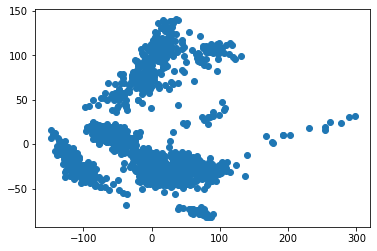

In [34]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])

#plot first 2 PCA axes
#clustered by tissue type?

The PCA output DataFrame does not note the names of the samples. To get the names, we have to grab them from the row names of our `pca_input` DataFrame.

In [37]:
pca_input.index #list of samples names

Index(['GTEX-N7MS-0007-SM-2D7W1', 'GTEX-N7MS-0011-R10A-SM-2HMJK',
       'GTEX-N7MS-0011-R11A-SM-2HMJS', 'GTEX-N7MS-0011-R1a-SM-2HMJG',
       'GTEX-N7MS-0011-R2a-SM-2HML6', 'GTEX-N7MS-0011-R3a-SM-33HC6',
       'GTEX-N7MS-0011-R4a-SM-2HMKW', 'GTEX-N7MS-0011-R5a-SM-2HMK8',
       'GTEX-N7MS-0011-R6a-SM-2HMJ4', 'GTEX-N7MS-0011-R7a-SM-2HMKN',
       ...
       'GTEX-X4LF-0526-SM-3NMB6', 'GTEX-X4LF-1726-SM-3NMBZ',
       'GTEX-X4XX-0005-SM-3NMCS', 'GTEX-X4XX-0011-R1B-SM-3P622',
       'GTEX-X4XX-0011-R2A-SM-3P623', 'GTEX-X4XX-0126-SM-3NMC2',
       'GTEX-X4XX-0626-SM-3NMC1', 'GTEX-X4XX-1126-SM-3NMBY',
       'GTEX-X4XX-2926-SM-3NMB1', 'GTEX-X4XX-3026-SM-3NMB2'],
      dtype='object', length=1641)

In [38]:
pca_output_df["SAMPID"] = pca_input.index
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,SAMPID
0,-110.413957,-14.334740,51.745518,-21.305562,-11.809374,5.499137,7.879405,-3.500392,-13.551930,-29.969392,GTEX-N7MS-0007-SM-2D7W1
1,5.681966,125.914671,9.134416,-15.361095,25.276640,-8.446178,-29.123760,-3.442356,-11.013136,46.178364,GTEX-N7MS-0011-R10A-SM-2HMJK
2,79.909076,110.935439,17.085827,-49.776856,17.003922,67.551579,85.044224,-32.970651,-39.456172,11.713026,GTEX-N7MS-0011-R11A-SM-2HMJS
3,-0.347441,112.246918,12.691163,-12.519273,15.641341,-9.176034,-37.572638,6.952393,-8.110808,22.213172,GTEX-N7MS-0011-R1a-SM-2HMJG
4,5.870993,94.772425,4.917727,-7.156669,13.732412,-19.220230,-31.723584,6.157431,4.361721,-3.703034,GTEX-N7MS-0011-R2a-SM-2HML6
...,...,...,...,...,...,...,...,...,...,...,...
1636,7.591250,-32.177090,6.604459,-7.661701,0.301042,88.683994,-60.358320,-26.739086,-8.409964,2.513512,GTEX-X4XX-0126-SM-3NMC2
1637,-44.093672,7.661655,-38.931134,65.432885,15.476222,25.019250,47.227484,-1.176297,29.601193,13.314282,GTEX-X4XX-0626-SM-3NMC1
1638,-22.706015,-7.790671,-16.560728,7.469911,-17.471936,-8.335336,0.055956,10.386769,-28.488913,-1.082256,GTEX-X4XX-1126-SM-3NMBY
1639,94.765495,104.558619,18.559766,-55.980132,8.899326,69.093378,107.839263,-42.543826,-36.125533,6.334059,GTEX-X4XX-2926-SM-3NMB1


Now we can merge our PCA output DataFrame with our metadata DataFrame, since they share a column of unique sample IDs. We use the pandas `merge()` function to achieve this.

In [39]:
df_metadata

,SAMPID,SMTS
0,GTEX-N7MS-0007-SM-26GME,Blood
1,GTEX-N7MS-0007-SM-26GMV,Blood
2,GTEX-N7MS-0007-SM-2D43E,Blood
3,GTEX-N7MS-0007-SM-2D7W1,Blood
4,GTEX-N7MS-0009-SM-2BWY4,Blood
...,...,...
3052,K-562-SM-3NMAP,Bone Marrow
3053,K-562-SM-3NMDG,Bone Marrow
3054,K-562-SM-3P61Y,Bone Marrow
3055,NA12878-SM-2XJZN,NaN


In [42]:
pca_output_df = pd.merge(pca_output_df, df_metadata, on = "SAMPID")
pca_output_df
#need to merge the two dataframes on the shared "SAMPID" column
#store back in original dataframe

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,SAMPID,SMTS_x,SMTS_y,SMTS
0,-110.413957,-14.334740,51.745518,-21.305562,-11.809374,5.499137,7.879405,-3.500392,-13.551930,-29.969392,GTEX-N7MS-0007-SM-2D7W1,Blood,Blood,Blood
1,5.681966,125.914671,9.134416,-15.361095,25.276640,-8.446178,-29.123760,-3.442356,-11.013136,46.178364,GTEX-N7MS-0011-R10A-SM-2HMJK,Brain,Brain,Brain
2,79.909076,110.935439,17.085827,-49.776856,17.003922,67.551579,85.044224,-32.970651,-39.456172,11.713026,GTEX-N7MS-0011-R11A-SM-2HMJS,Brain,Brain,Brain
3,-0.347441,112.246918,12.691163,-12.519273,15.641341,-9.176034,-37.572638,6.952393,-8.110808,22.213172,GTEX-N7MS-0011-R1a-SM-2HMJG,Brain,Brain,Brain
4,5.870993,94.772425,4.917727,-7.156669,13.732412,-19.220230,-31.723584,6.157431,4.361721,-3.703034,GTEX-N7MS-0011-R2a-SM-2HML6,Brain,Brain,Brain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,7.591250,-32.177090,6.604459,-7.661701,0.301042,88.683994,-60.358320,-26.739086,-8.409964,2.513512,GTEX-X4XX-0126-SM-3NMC2,Skin,Skin,Skin
1637,-44.093672,7.661655,-38.931134,65.432885,15.476222,25.019250,47.227484,-1.176297,29.601193,13.314282,GTEX-X4XX-0626-SM-3NMC1,Muscle,Muscle,Muscle
1638,-22.706015,-7.790671,-16.560728,7.469911,-17.471936,-8.335336,0.055956,10.386769,-28.488913,-1.082256,GTEX-X4XX-1126-SM-3NMBY,Heart,Heart,Heart
1639,94.765495,104.558619,18.559766,-55.980132,8.899326,69.093378,107.839263,-42.543826,-36.125533,6.334059,GTEX-X4XX-2926-SM-3NMB1,Brain,Brain,Brain


The last step is to add color to our plot by grouping our DataFrame on tissue, then iterating over the tissues and adding to a scatter plot. The default location of the legend overlaps the plot, so we provide some options to `plt.legend()` to shift it to the right and create two columns. We figured this out by reading the documentation for the corresponding functions and searching online!

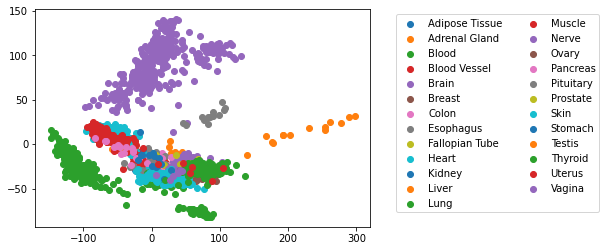

In [47]:
fig, ax = plt.subplots()
tissues = pca_output_df.groupby("SMTS") #group by tissue gives you name of group and group itself
for name, group in tissues:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)
#add legend in upper right
#bbox_to_anchor puts legend outside of plot..
#2 columns so fits nicer

#subsetting the dataframe
#loop through the diff tissues and add them separately to scatter plot